In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
classified = pd.read_csv('classified_dataframe.csv')

/software/anaconda3/2019.03/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
classified.head()

,Unnamed: 0,SubjectID,Year Term ID_x,Term GPA,Cumul GPA,Cumul Hrs Earned,Cumul Hrs GPA,Term Transfer Hrs,Year Term ID_y,Ps1 Timestat Code,...,Ps1 Acad Standing Desc,Gender,Citizen Country Name,HS City,SAT Total,ACT Composite,Degree Award Date,Degree Confer Date,Classification,classification
0,0,172789163,20062.0,0.0,3.07,128.0,128.0,0.0,20062.0,X,...,ACTIVE,M,USA,.,NaN,NaN,5/16/04 0:00,10/5/06 0:00,N,N
1,1,172846340,20102.0,3.3,2.70,128.0,77.0,26.0,20102.0,P,...,PROBATION,F,USA,Burnt Hills,NaN,NaN,5/16/10 0:00,5/16/10 0:00,N,N
2,2,172846340,20102.0,3.3,2.70,128.0,77.0,26.0,20102.0,P,...,PROBATION,F,USA,Burnt Hills,NaN,NaN,5/16/10 0:00,5/16/10 0:00,N,N
3,3,172857770,20162.0,0.0,2.20,128.0,124.0,0.0,20162.0,F,...,ACTIVE,M,USA,Wallingford,NaN,NaN,8/31/16 0:00,12/31/16 0:00,N,N
4,4,172857770,20171.0,0.0,2.20,132.0,124.0,4.0,20162.0,F,...,ACTIVE,M,USA,Wallingford,NaN,NaN,8/31/16 0:00,12/31/16 0:00,N,N


In [ ]:
normal_grad=[]
nine_twelve =[]
twelve_more=[]
non_grad=[]
for ind in classified_students.index:
   
    if (classified_students.loc[ind, 'classification'] == 'N'):
        normal_grad.append(classified_students.loc[ind, 'SubjectID'])
    elif (classified_students.loc[ind, 'classification'] == 'NG'):
        non_grad.append(classified_students.loc[ind, 'SubjectID'])
    elif (classified_students.loc[ind, 'classification'] == 'NT'):
        nine_twelve.append(classified_students.loc[ind, 'SubjectID'])
    elif (classified_students.loc[ind, 'classification'] == 'TP'):
        twelve_more.append(classified_students.loc[ind, 'SubjectID'])

In [6]:
domestics_student = classified[classified['Citizen Country Name']== 'USA'].groupby(['SubjectID']).tail(1)

In [8]:
domestics_student['Cumul GPA'].describe()

count    17881.000000
mean         3.240829
std          0.610689
min          0.000000
25%          2.980000
50%          3.370000
75%          3.660000
max          4.000000
Name: Cumul GPA, dtype: float64

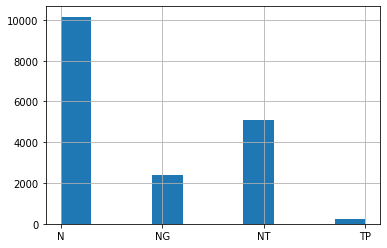

In [12]:
domestics_student['classification'].hist()

In [14]:
international_student = classified[classified['Citizen Country Name']!= 'USA'].groupby(['SubjectID']).tail(1)

In [15]:
international_student['Cumul GPA'].describe()

count    2506.000000
mean        3.234685
std         0.616531
min         0.000000
25%         2.970000
50%         3.370000
75%         3.660000
max         4.000000
Name: Cumul GPA, dtype: float64

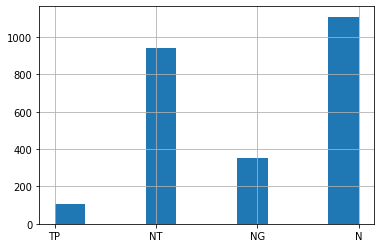

In [16]:
international_student['classification'].hist()

In [20]:
domestics_student['classification'].value_counts()

N     10158
NT     5116
NG     2374
TP      233
Name: classification, dtype: int64

In [22]:
10158/(10158+5116+2374+233)
#normal grad domestic

0.5680890330518428

In [24]:
5116/(10158+5116+2374+233)
#nine-twelve grad


0.28611375202729156

In [26]:
2374/(10158+5116+2374+233)
#non grad domestic

0.13276662379061574

In [27]:
233/(10158+5116+2374+233)
#twelve plus domestic


0.013030591130249985

In [21]:
international_student['classification'].value_counts()

N     1109
NT     940
NG     350
TP     107
Name: classification, dtype: int64

In [35]:
international_student['classification'].count()

2506

In [23]:
1109/(1109+940+350+107)
#normal grad international

0.44253790901835593

In [25]:
940/(1109+940+350+107)
#nine-twelve grad international

0.3750997605746209

In [28]:
350/(1109+940+350+107)
#non grad international

0.13966480446927373

In [29]:
107/(1109+940+350+107)
#twelve + international

0.0426975259377494

In [36]:
domestic_vs_inter = [
    ['8 semesters', 10158/(17881), 1109/(2506)],
    ['9 - 12 semesters', 5116/(17881),940/(2506)],
    ['>12 semesters', 233/(17881), 107/(2506)],
    ['never graduated', 2374/(17881),350/(2506)]
]
df_domestic_vs_inter = pd.DataFrame(domestic_vs_inter, columns = ['Graduation','Domestic Students', 'International Students'])

In [37]:
df_domestic_vs_inter

,Graduation,Domestic Students,International Students
0,8 semesters,0.568089,0.442538
1,9 - 12 semesters,0.286114,0.375100
2,>12 semesters,0.013031,0.042698
3,never graduated,0.132767,0.139665


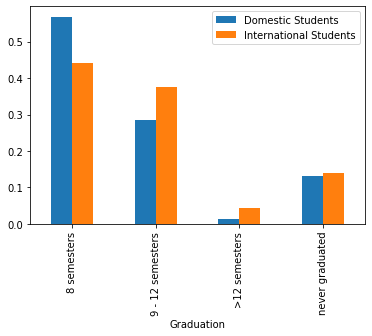

In [39]:
df_domestic_vs_inter.plot.bar(x='Graduation')